In [176]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [177]:
file_path = '../output/cmp123_crit_numcores/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/cmp123_crit_numcore_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

only_ls = [0.0] * len(criticality_prob_list)
ds = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)
ideal = [0.0] * len(criticality_prob_list)
reduce = [0.0] * len(criticality_prob_list)
reduce_abs = [0.0] * len(criticality_prob_list)

In [178]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_ls, core_ds, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    only_ls[index] += core_ls
    ds[index] += core_ds
    ours[index] += core_ours
    ideal[index] += core_ls * ((criticality_prob_list[index])*1 + (1-criticality_prob_list[index])*0.5)
    # ours[index] += core_ours*0.7
    
for index in range(len(only_ls)-1):
    # print((ours[index]-ideal[index]))
    # print((only_ls[index]-ideal[index]))
    reduce[index] = (only_ls[index]-ours[index])/(only_ls[index]-ideal[index])
    reduce_abs[index] = 1-ours[index]/only_ls[index]
# reduce[len(only_ls)-1] = 1.0
    
sum = 0
for index in range(len(only_ls)-1):
    sum += reduce[index]
print(sum/(len(reduce)-1))
print(reduce_abs)

0.6287465727769995
[0.25942591155934847, 0.26758499413833525, 0.2513894826849081, 0.24084411164057185, 0.21351603033124922, 0.18680894831576234, 0.15484034465281304, 0.10378852478986467, 0.05294753271701291, 0.020141220048616626, 0.0]


In [179]:
print(only_ls)
print(ds)
print(ours)
print(ideal)
print(reduce)

[6.445, 6.824, 7.017, 7.345, 7.517, 7.778, 7.892, 8.209, 8.329, 8.639, 8.862]
[4.773, 5.566, 6.145, 6.687, 7.166, 7.665, 8.192, 8.997, 9.463, 9.522, 8.862]
[4.773, 4.998, 5.253, 5.576, 5.912, 6.325, 6.67, 7.357, 7.888, 8.465, 8.862]
[3.2225, 3.7532, 4.210200000000001, 4.774249999999999, 5.2619, 5.8335, 6.313600000000001, 6.97765, 7.496100000000001, 8.207049999999999, 8.862]
[0.5188518231186968, 0.5946333203074117, 0.6284737067122705, 0.6881260332587766, 0.711720101104164, 0.7472357932630495, 0.7742017232640654, 0.6919234985990981, 0.5294753271701297, 0.40282440097233313, 0.0]


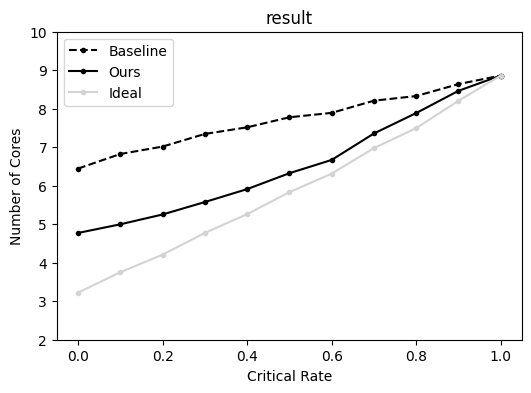

In [180]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, only_ls, label='Baseline', color='black', linestyle='dashed', marker='.')
# plt.plot(criticality_prob_list, ds, label='Switching', color='gray', marker='_')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', marker='.')
plt.plot(criticality_prob_list, ideal, label='Ideal', color='lightgray', marker='.')

# plt.plot(criticality_prob_list, only_ls, label='Lockstep', color='black', linestyle='dashed', marker='.')
# plt.plot(criticality_prob_list, ours, label='Non-Lockstep', color='black', marker='.')

plt.title('result')
plt.xlabel('Critical Rate')
plt.ylabel('Number of Cores')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylim(2,10)
plt.legend()
plt.show()